# Teorema de Green

In [1]:
import numpy as np
import sympy as sp
import plotly.graph_objects as go
import sympy.vector as sv
import av_utils as av
x,y,z,t = sp.symbols('x y z t', real=True)
R = sv.CoordSys3D('R')
sp.init_printing()
from collections.abc import Iterable

O teorema de Green fornece a relação entre uma integral de linha ao redor de uma curva fechada simples $C$ e uma integral dupla sobre a região do plano $D$ delimitada por $C$. Ou seja, em um lado a gente tem uma integral de linha de um campo vetorial e no outro lado a gente tem uma integral dupla.

**Teorema de Green**:

Seja $C$ uma curva plana simples, fechada, contínua por partes, orientada positivamente, e seja $D$ a região delimitada por $C$. Se $P$ e $Q$ têm derivadas parciais de primeira ordem contínuas sobre uma região aberta que
contenha $D$, então

$$
\oint_C P dx + Q dy = \iint_D (\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y}) dA
$$

**EXEMPLO:**

Calcule $\oint x^4 dx + x y dy$, onde $C$ é a curva triangular constituida pelos segmentos de reta de $(0,0)$ a $(1,0)$, de $(1,0)$ a $(0,1)$ e de $(0,1)$ a $(0,0)$

In [2]:
fig = go.Figure()
fig.add_scatter(x= [0,1,0,0], y=[0,0,1,0], fill='toself')
fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))

Aqui nos temos uma curva fechada (o triângulo) e uma função vetorial $\vec F(x,y) = x^4 \hat i + x y \hat j$. Calculando o lado direito do teorema de Green temos

$$
\frac{\partial Q}{\partial x} -\frac{\partial Q}{\partial x} = \frac{\partial}{\partial x}(x y) - \frac{\partial}{\partial y}(x^4) = y
$$
Então em vez de resolver a integral de linha podemos resolver a integral dupla
$$
\int^1_0 \int^{1-x}_0 y \; dy\;dx
$$

In [3]:
sp.integrate(y,(y,0,1-x),(x,0,1))

**EXERCICIO:** Resolvem o lado direito da igualidade e mostram que o resultado é igual mesmo!

**EXERCICIO:** Calcule $\oint_C (3y - e^{\sin(x)})dx + (7x + \sqrt{y^4 +1})dy$, onde $C$ é o circulo $x^2 + y^2 =9$.

Podemos usar do teorema de Green para calcular a área de uma região fechada. Basta escolher uma função arbitraria $\vec F(x,y) = P(x,y) \hat i + Q(x,y) \hat j$ de tal forma que $\frac{\partial Q}{\partial x} -\frac{\partial Q}{\partial x} =1$. Por exemplo, as seguintes funções satisfazem essa condição
$$
\vec F(x,y) = -y \hat i \rightarrow A = -\oint y \;dx \\
F(x,y) = x \hat j \rightarrow A = \oint x \;dy \\
F(x,y) = -\frac{y}{2} \hat i + \frac{x}{2} \hat j \rightarrow A = -\frac{1}{2}\oint y \;dx - x\;dy
$$

**EXERCCIO:** Determine a area delimitada pela elipse $\frac{x^2}{a^2} + \frac{y^2}{b^2}=1$

In [4]:
eq = sp.Eq(x**2/4+y**2/2,1)

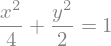

In [5]:
eq

In [6]:
av.plot_implicit(eq, (x,-2,2), (y,-2,2))

In [24]:
def line_integral_scalar(field,curve,a):
    '''
    - Arguments:
        `field`: Scalar field F(x,y,z). 
        `curve`: one or a list of parametrized curve r(t) = x(t)i + y(t)j + z(t)k
        `a`: a tuple or a list of tuples each one as (parameter of the curve, initial point, final point
        Note: if the field is tridimensional, the curve also must have the same dimension. 
    - Return:
        line integral of the scalar filed along the curve(s) for the given interval(s). 

    ===================
    Example:
        import sympy as sp
        import av_utils as av
        x,y,z = sp.symbols('x y z')
        def field(x,y,z):
            return z**2 +x +y
        l = av.lines([(1,2,3), (3,4,5),(5,6,7)])
        av.line_integral_scalar(z, curve=l, a=(t,0,3)) # one interval for all curves
        av.line_integral_scalar(z, curve=l, a=((t,0,3),(t,0,1))) #one interval for each curve
    '''
    global x,y,z
    

    if isinstance(curve, Iterable):
        R = list(curve[0].separate().keys())[0]
        if not isinstance(a[0], Iterable):
            a = len(curve)*(a,)
    else:
        R = list(curve.separate().keys())[0]
        curve = list(curve)
        a = list(a)


    integral = 0
    for item,var in zip(curve,a):
        param = [p for p in item.free_symbols if not p.is_Vector]
        assert len(param)==1, "A curve has only one parameter"
        assert param[0]==var[0], "the parameter of the curve must be the same as the integration variable."
        rx,ry,rz = item.dot(R.i),item.dot(R.j),item.dot(R.k)
        
        # parametrizing the field using the curve parametric equation
        parametrized_field = field.subs(x,rx).subs(y,ry).subs(z,rz)
        module = item.diff().magnitude().simplify()
            
    
        integrand = (parametrized_field*module).simplify()
        integral += sp.integrate(integrand,var).evalf()
        
    return integral

In [25]:
def field(x,y,z):
    return z

In [26]:
l = av.lines([(1,2,3), (3,4,5),(5,6,7)])

In [27]:
line_integral_scalar(z, curve=l, a=(t,0,3))

In [29]:
line_integral_scalar(z, curve=l, a=((t,0,3),(t,0,1)))